#### Import libraries

In [111]:
import pandas as pd
import seaborn as sns
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt


%load_ext pycodestyle_magic

#### Functions

In [143]:
def boxplot(df, x, y, order):
    '''

    This function provides a boxplot
    :param df: input dataframe
    :param x: input column representing the x-axis
    :param y: input column representing the y-axis
    :param order: desired order to display the boxplot
    :return: boxplot of input columns

    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.boxplot(x=x, y=y, data=df, order=order)
    plt.show()

#### Load dataset

In [112]:
students_df = pd.read_csv("StudentsPerformance.csv")

In [113]:
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [114]:
students_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [115]:
students_df.shape

(1000, 8)

#### Checking for nulls

In [116]:
students_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in this dataset, therefore we can proceed with the analysis.

#### Add column with average overall score

Here, we add a column that corresponds to the mean scores of all tests (math, reading and writing). We will use this column to analyze the performance between the students and as out target.

In [117]:
students_df["overall_score"] = (students_df["math score"] + students_df["reading score"] + students_df["writing score"]) / 3

In [118]:
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [119]:
students_df.to_csv("students_df.csv")

#### Understanding the distribution of the data

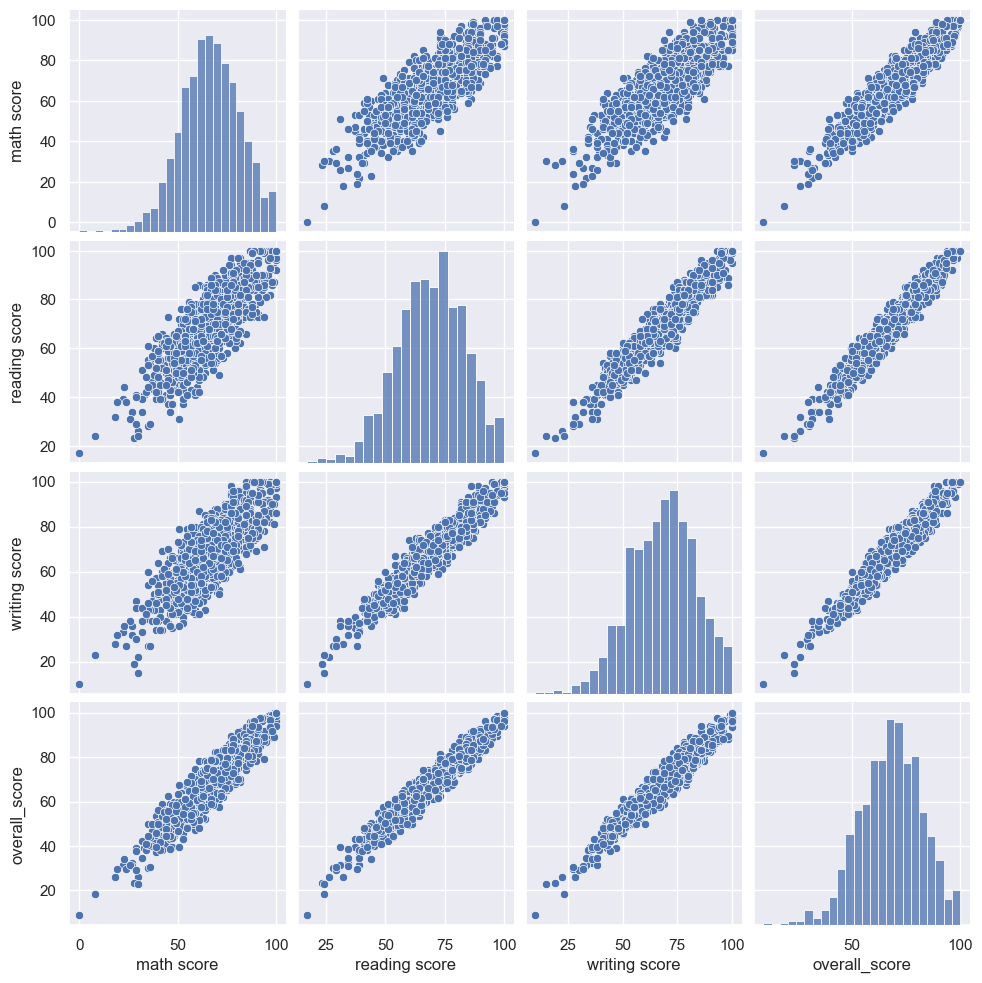

In [120]:
sns.pairplot(students_df)

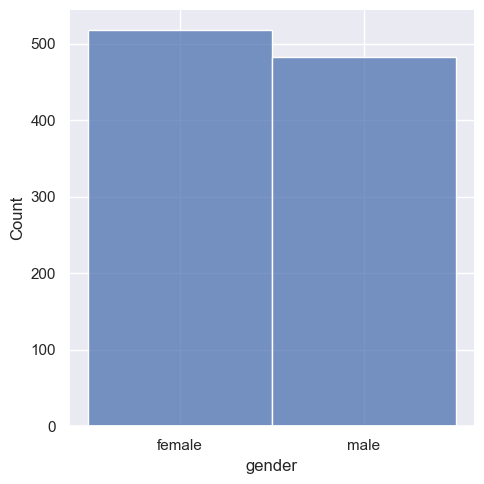

In [121]:
sns.displot(students_df, x="gender")

#### Question 1

Does the parental level of education has any impact to the overall average score?

In [122]:
sorter_education_level = ["some high school",
                          "high school",
                          "some college",
                          "associate's degree",
                          "bachelor's degree",
                          "master's degree"]

In [123]:
grouped_level_education = students_df.groupby(by=["parental level of education"]).mean(numeric_only=True).reindex(sorter_education_level)

In [124]:
grouped_level_education

,math score,reading score,writing score,overall_score
parental level of education,,,,
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939
some college,67.128319,69.460177,68.840708,68.476401
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
master's degree,69.745763,75.372881,75.677966,73.598870


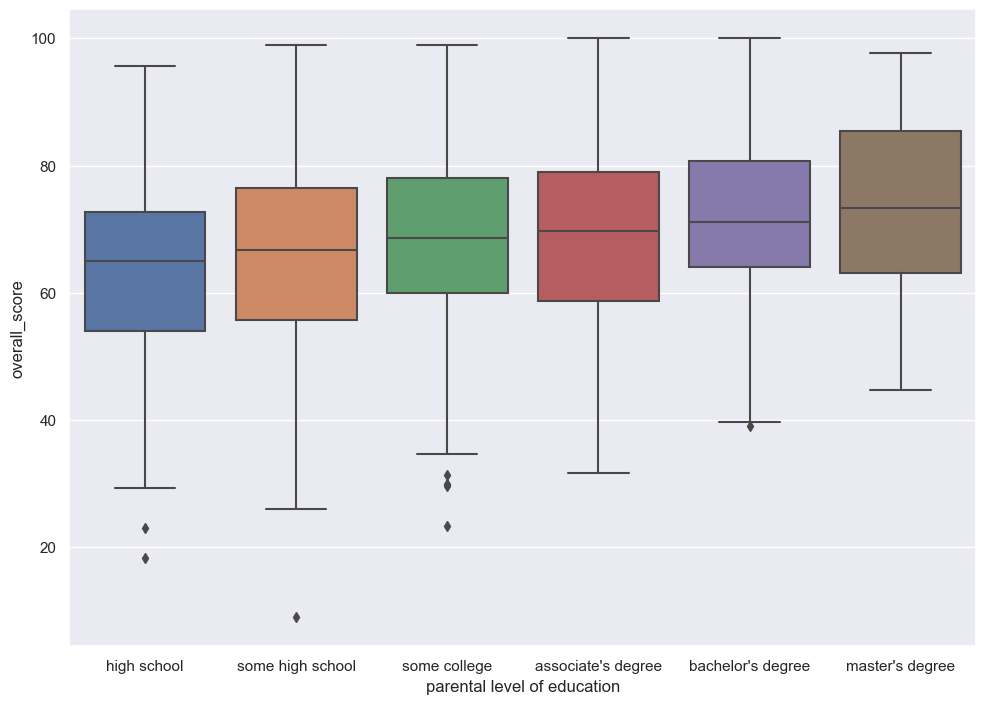

In [144]:
my_order = students_df.groupby(by=["parental level of education"])["overall_score"].median().sort_values(ascending=False).iloc[::-1].index
boxplot(students_df, "parental level of education", "overall_score", my_order)

By the boxplot above, it is possible to see that the median of the scores of those students whose parents have higher education (bachelor's degree, master's degree, associate's degree) are higher than those who are included in (some college, high school, some high school).

#### Checking normality of groups

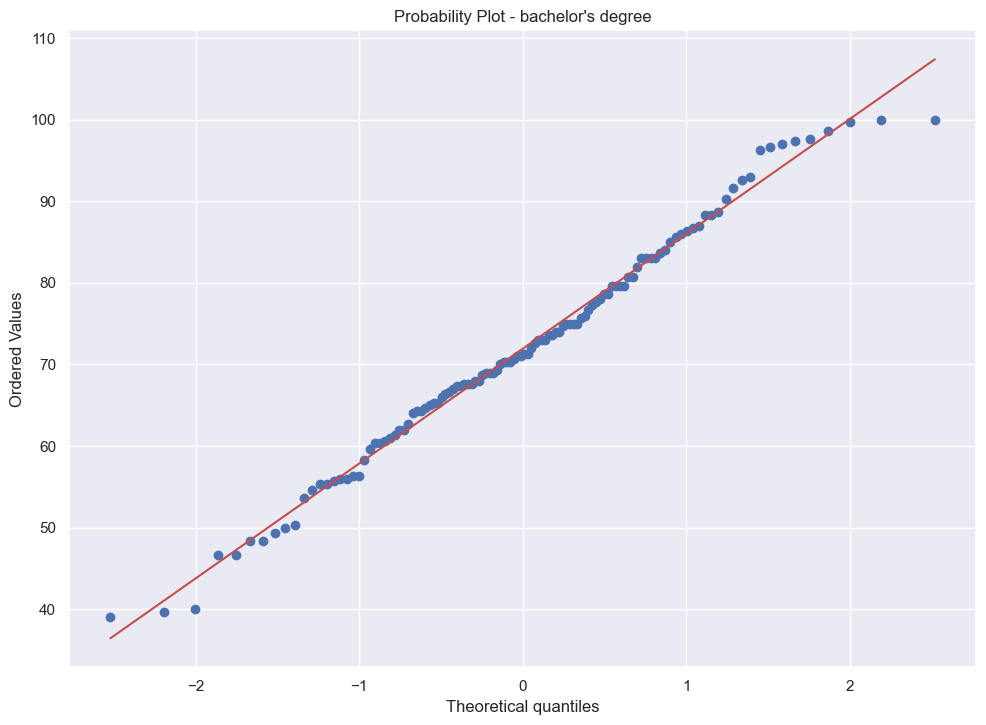

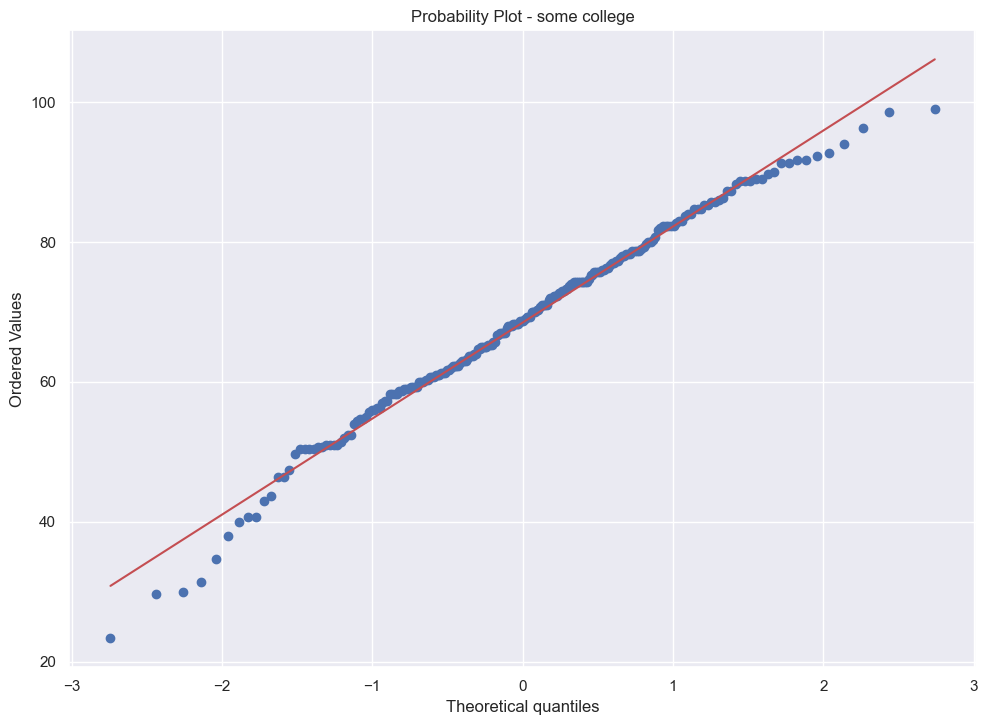

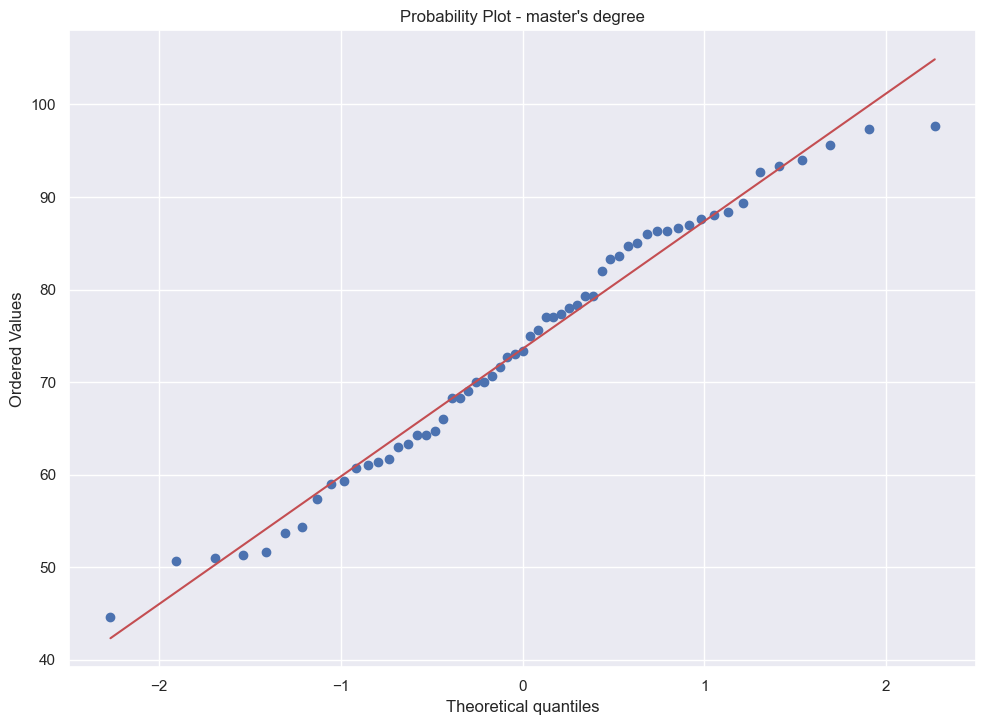

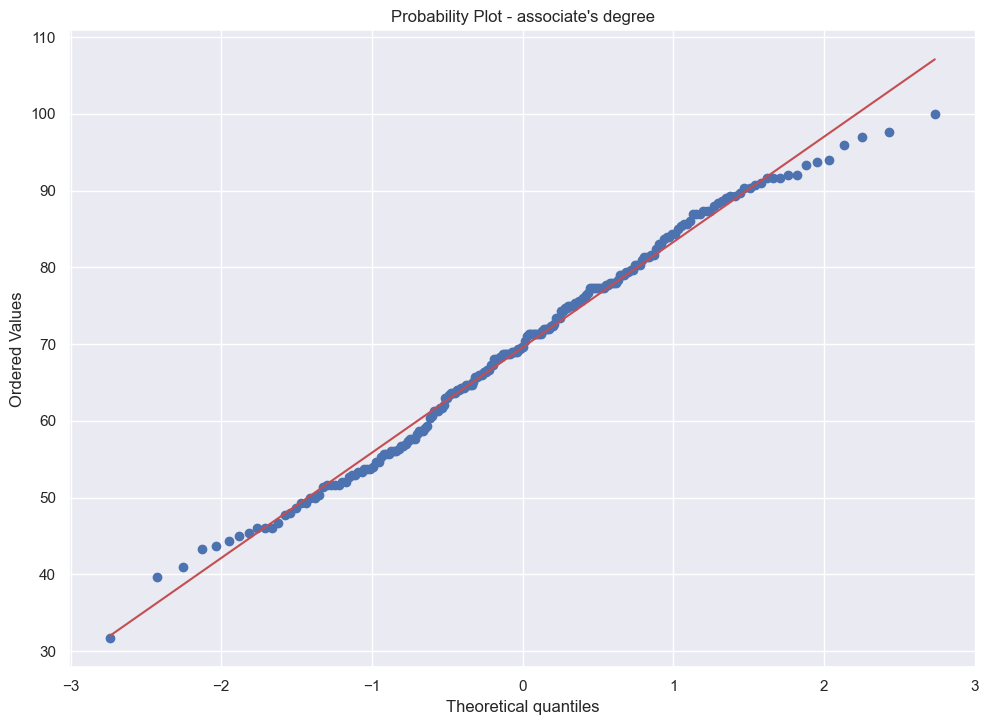

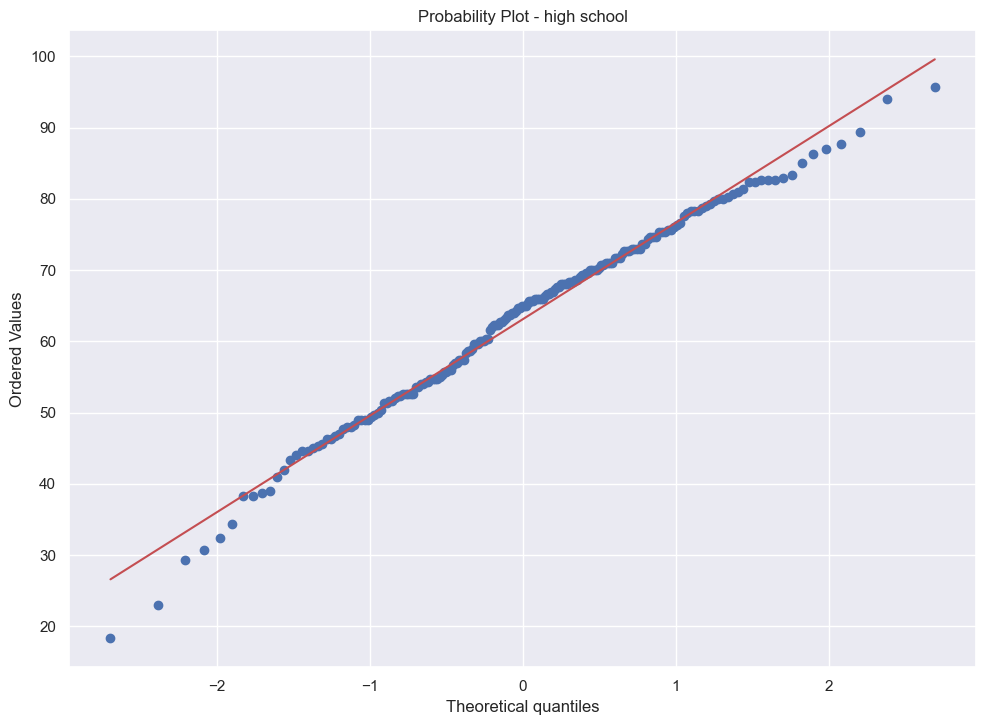

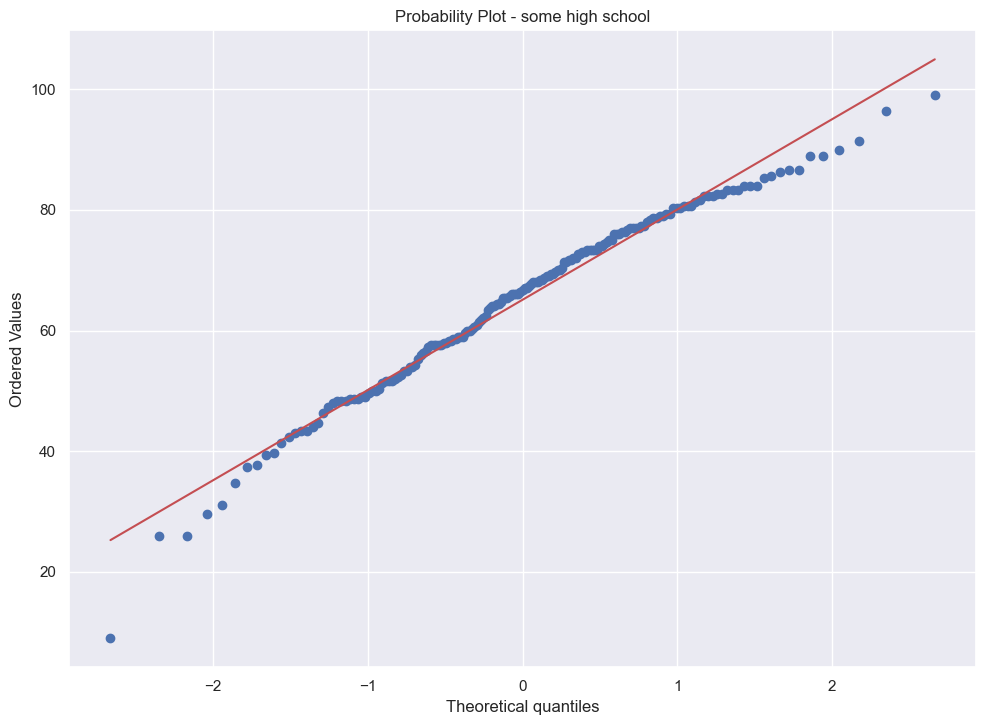

In [126]:
unique_education = students_df['parental level of education'].unique()
for education in unique_education:
    stats.probplot(students_df[students_df['parental level of education'] == education]['overall_score'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  education)
    plt.show()

Using the QQ plot, we can see that for each group the distribution is normal, so we can apply ANOVA to check if the mean of the scores in each group of parental level of education is statistically significant.

In [127]:
rp.summary_cont(students_df['overall_score'].groupby(students_df['parental level of education']))

,N,Mean,SD,SE,95% Conf.,Interval
parental level of education,,,,,,
associate's degree,222,69.5691,13.6709,0.9175,67.7608,71.3773
bachelor's degree,118,71.9237,13.9466,1.2839,69.3811,74.4664
high school,196,63.0969,13.5106,0.9650,61.1937,65.0002
master's degree,59,73.5989,13.6010,1.7707,70.0544,77.1433
some college,226,68.4764,13.7110,0.9120,66.6792,70.2736
some high school,179,65.1080,14.9841,1.1200,62.8979,67.3181


In [128]:
stats.f_oneway(students_df['overall_score'][students_df['parental level of education'] == "associate's degree"],
               students_df['overall_score'][students_df['parental level of education'] == "bachelor's degree"],
               students_df['overall_score'][students_df['parental level of education'] == 'high school'],
               students_df['overall_score'][students_df['parental level of education'] == "master's degree"],
               students_df['overall_score'][students_df['parental level of education'] == "some college"],
               students_df['overall_score'][students_df['parental level of education'] == "some high school"])

F_onewayResult(statistic=10.75314696233657, pvalue=4.3810464809431664e-10)

There is a statistically significant difference between the groups.

#### Question 2

The students who completed the test preparation were able to get a higher average score than those who didn’t?


There are no differences between the mean between those who completed the test preparation course and those who didn't.

In [129]:
students_df.groupby(by=["test preparation course"]).mean(numeric_only=True)

,math score,reading score,writing score,overall_score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


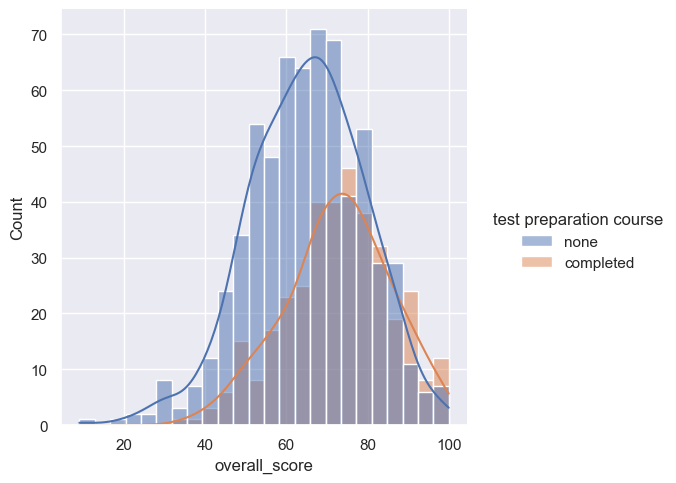

In [130]:
sns.displot(students_df, x="overall_score", hue="test preparation course", kde=True)

By the mean of each group, it is possible to see that those who completed the test preparation course received a higher average score. Next, we will use t-test to check if the difference in the means is statistically significant.

In [131]:
rp.ttest(group1= students_df['overall_score'][students_df['test preparation course'] == 'none'], group1_name= "None",
         group2= students_df['overall_score'][students_df['test preparation course'] == 'completed'], group2_name= "Completed")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(    Variable       N       Mean         SD        SE  95% Conf.   Interval
 0       None   642.0  65.038941  14.186707  0.559905  63.939472  66.138410
 1  Completed   358.0  72.669460  13.036960  0.689025  71.314402  74.024518
 2   combined  1000.0  67.770667  14.257326  0.450856  66.885933  68.655401,
                  Independent t-test   results
 0  Difference (None - Completed) =    -7.6305
 1             Degrees of freedom =   998.0000
 2                              t =    -8.3909
 3          Two side test p value =     0.0000
 4         Difference < 0 p value =     0.0000
 5         Difference > 0 p value =     1.0000
 6                      Cohen's d =    -0.5535
 7                      Hedge's g =    -0.5531
 8                 Glass's delta1 =    -0.5379
 9               Point-Biserial r =    -0.2567)

In [132]:
summary, results = rp.ttest(group1= students_df['overall_score'][students_df['test preparation course'] == 'none'], group1_name= "None",
         group2= students_df['overall_score'][students_df['test preparation course'] == 'completed'], group2_name= "Completed")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [133]:
print(summary)

    Variable       N       Mean         SD        SE  95% Conf.   Interval
0       None   642.0  65.038941  14.186707  0.559905  63.939472  66.138410
1  Completed   358.0  72.669460  13.036960  0.689025  71.314402  74.024518
2   combined  1000.0  67.770667  14.257326  0.450856  66.885933  68.655401


In [134]:
print(results)

                 Independent t-test   results
0  Difference (None - Completed) =    -7.6305
1             Degrees of freedom =   998.0000
2                              t =    -8.3909
3          Two side test p value =     0.0000
4         Difference < 0 p value =     0.0000
5         Difference > 0 p value =     1.0000
6                      Cohen's d =    -0.5535
7                      Hedge's g =    -0.5531
8                 Glass's delta1 =    -0.5379
9               Point-Biserial r =    -0.2567


The means are statistically significant, so we can conclude that those who completed the test preparation course received higher average score than those who didn't

#### Question 3

Is there any difference between performance/score in disciplines by gender?

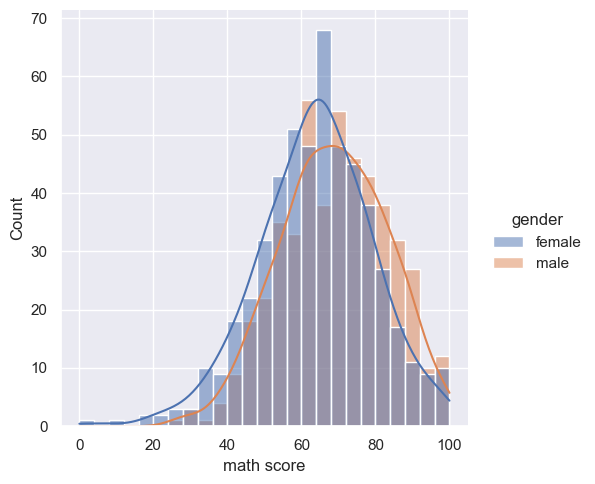

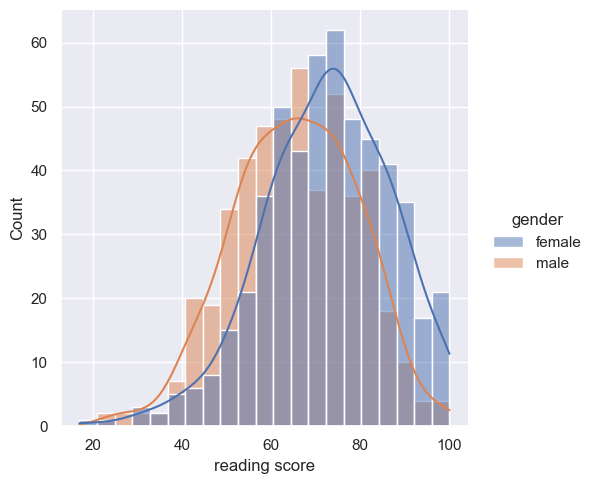

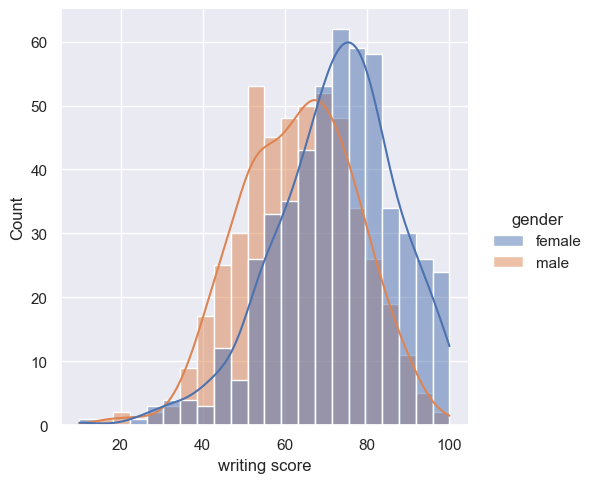

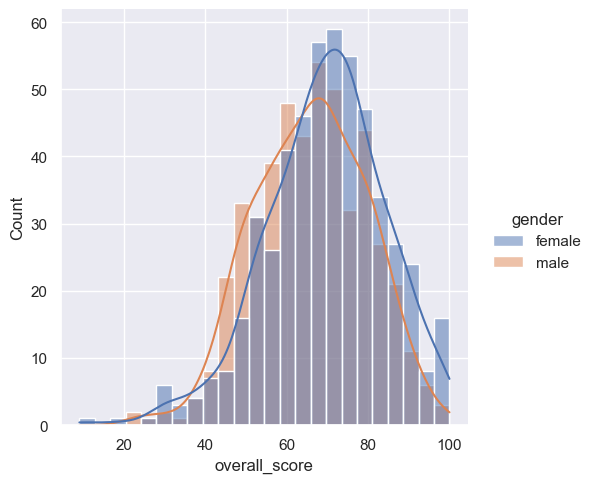

In [135]:
sns.displot(students_df, x="math score", hue="gender", kde=True)
sns.displot(students_df, x="reading score", hue="gender", kde=True)
sns.displot(students_df, x="writing score", hue="gender", kde=True)
sns.displot(students_df, x="overall_score", hue="gender", kde=True)

In [136]:
students_df.groupby(by=["gender"]).mean(numeric_only=True)

,math score,reading score,writing score,overall_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


When we analyze the means for each subject, the male gender performs better only in math.

We will use QQ plot to evaluate if we can use a t-test to check if the means are statistically significant for each discipline.

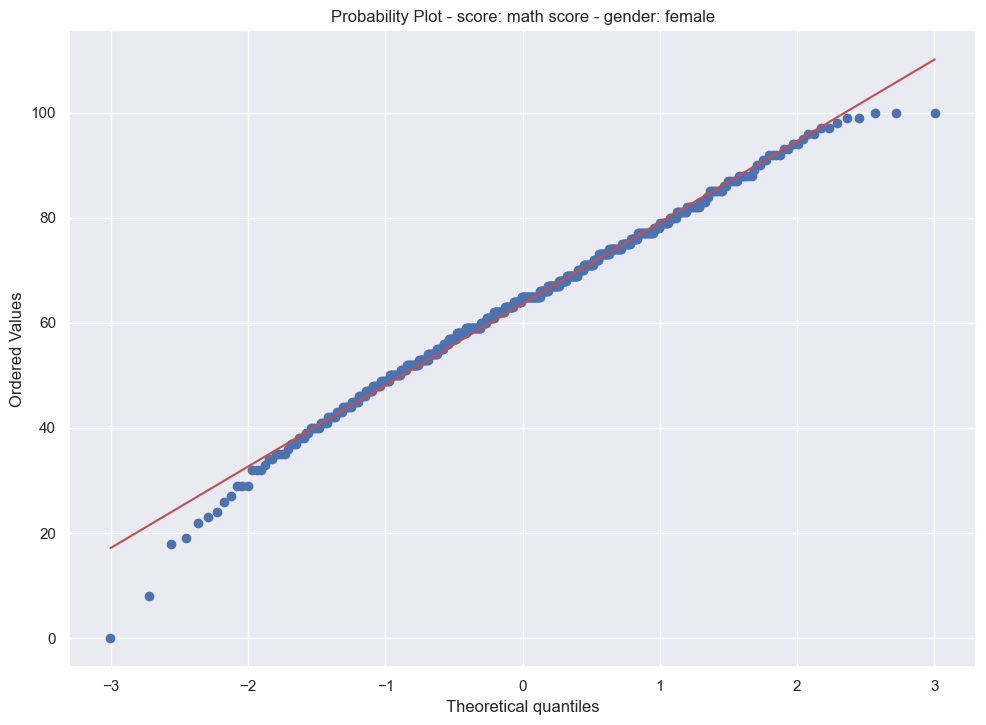

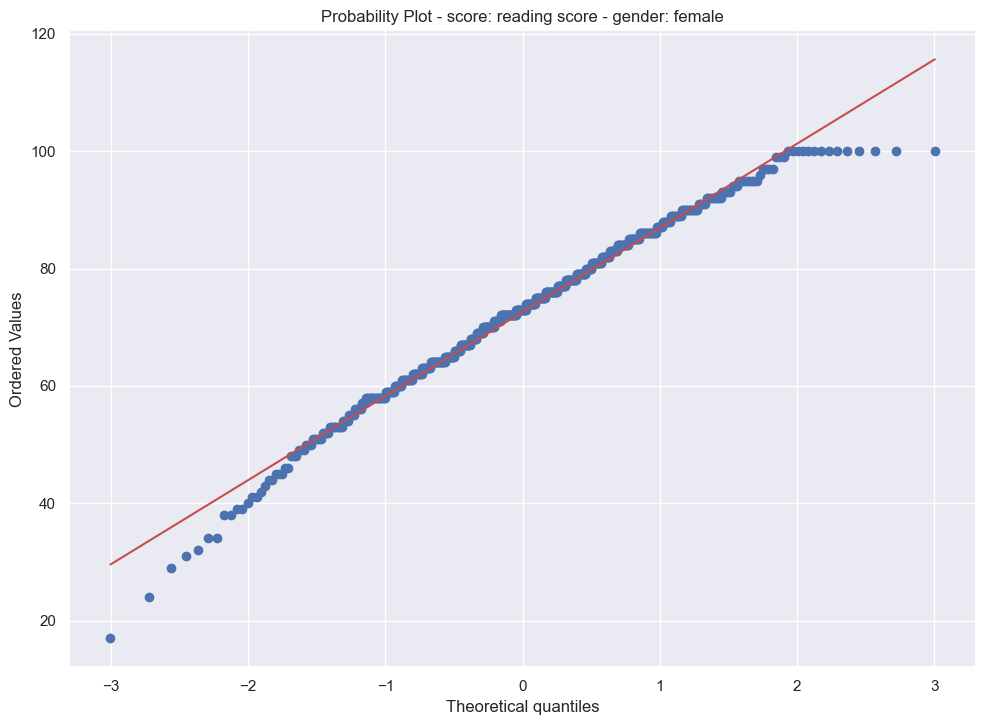

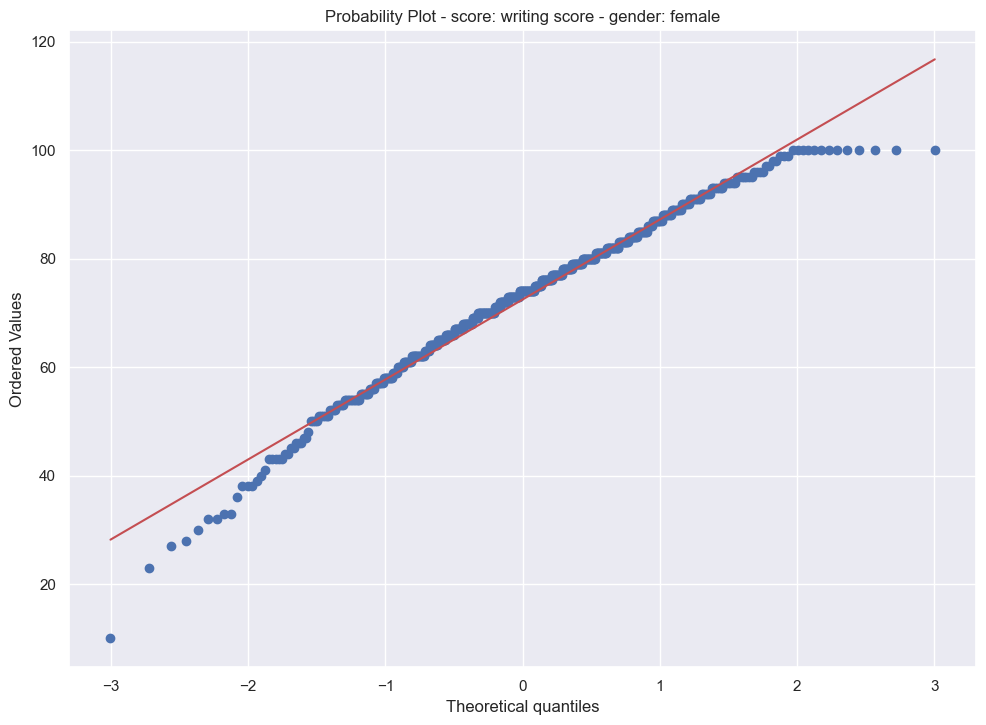

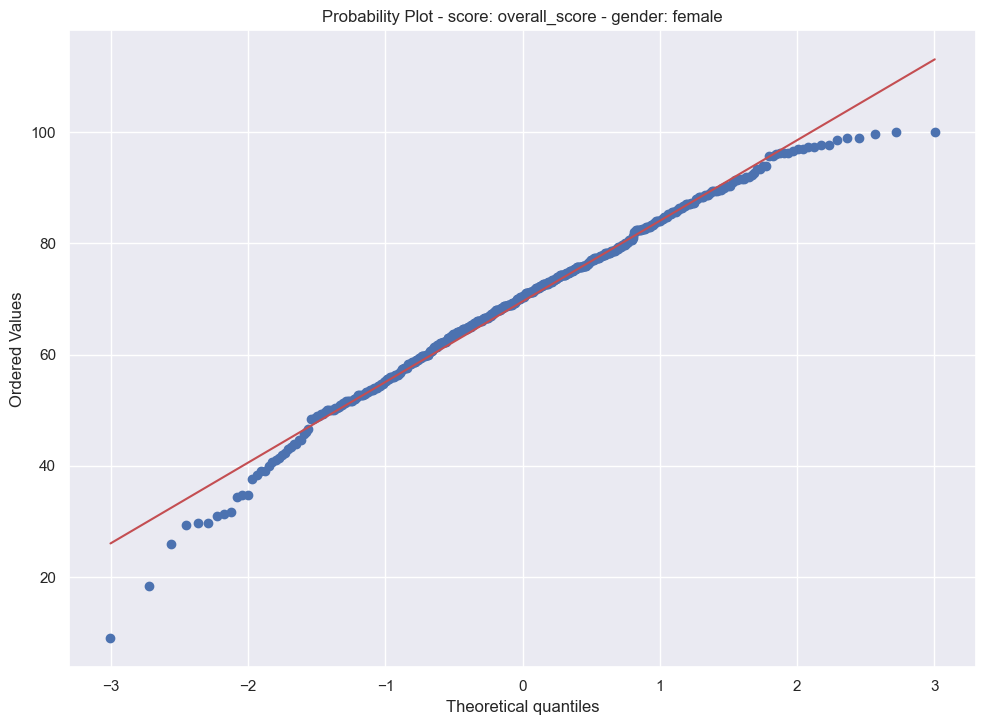

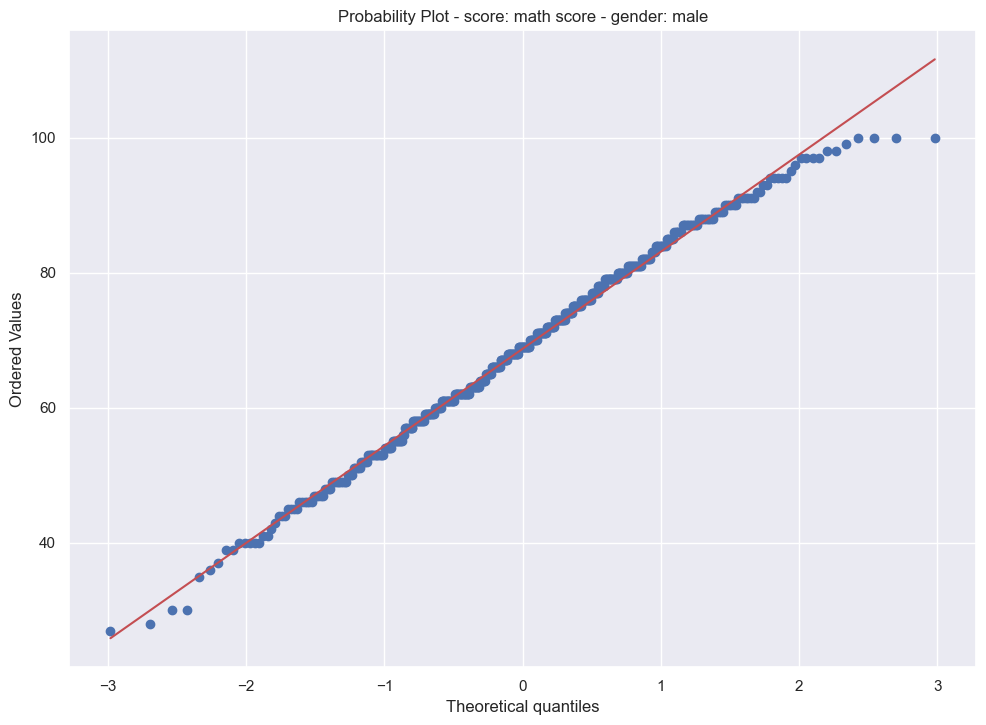

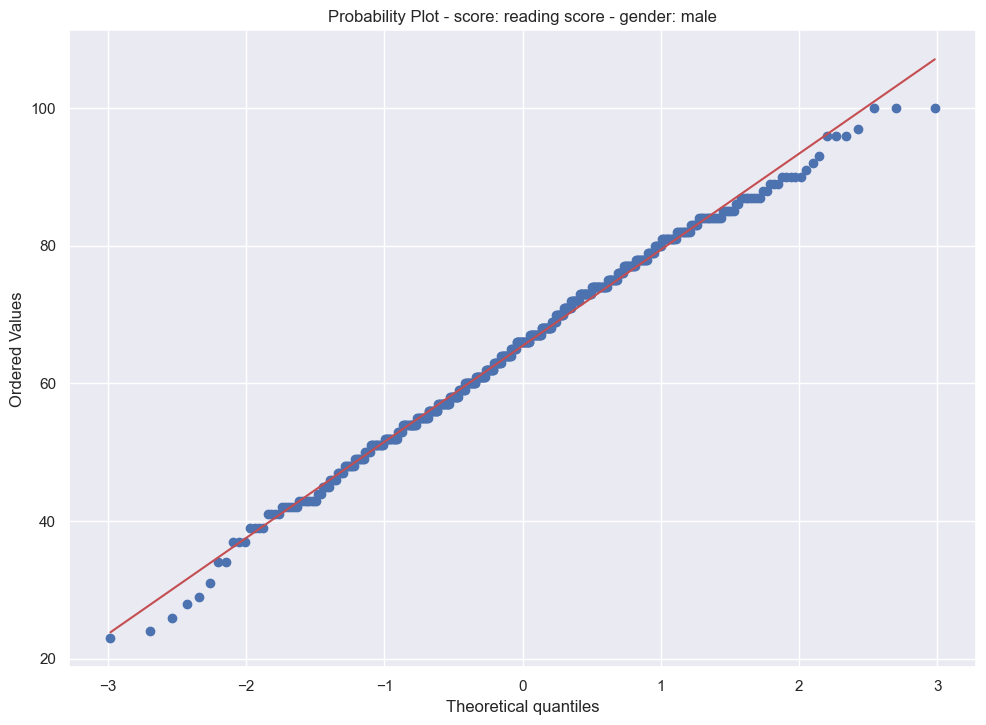

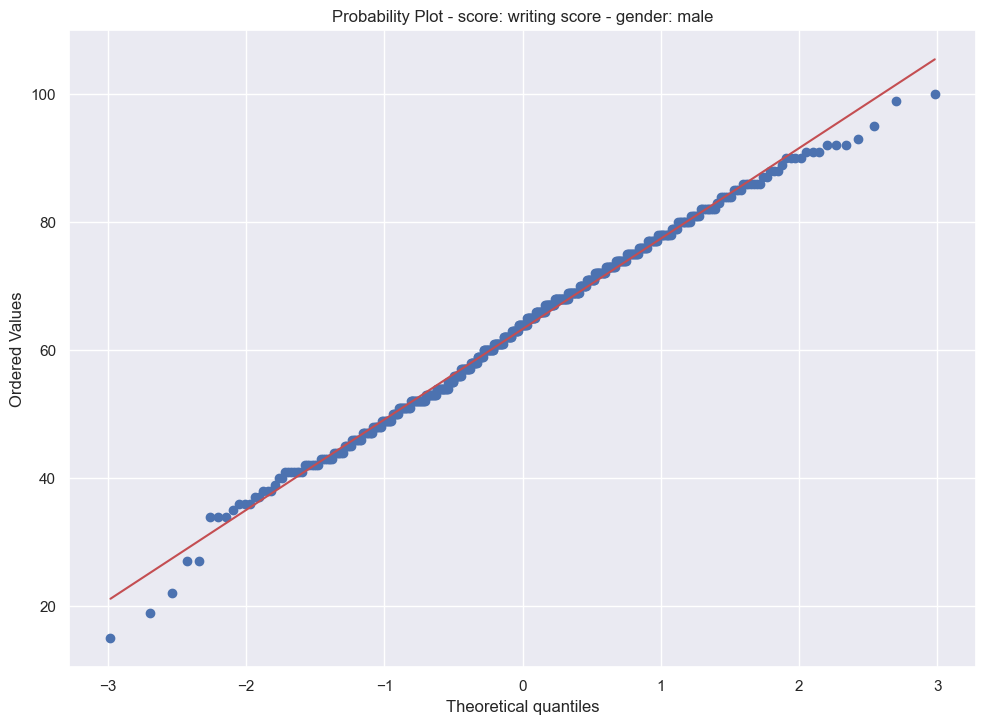

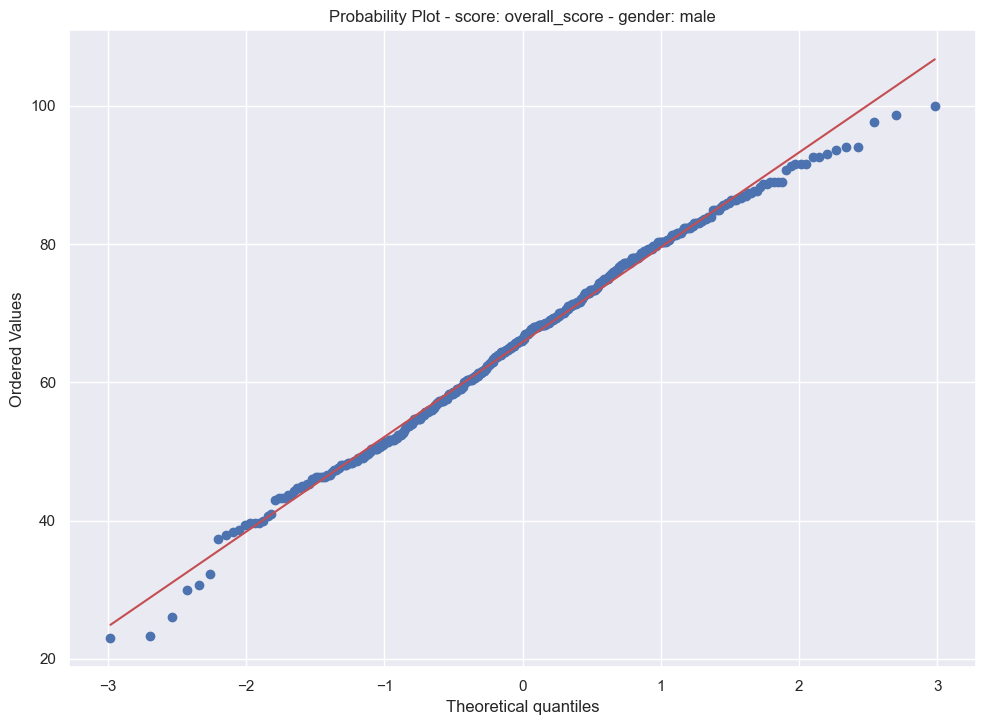

In [137]:
unique_gender = students_df['gender'].unique()
unique_disciplines = students_df.columns[5:]
for gender in unique_gender:
    for discipline in unique_disciplines:
        stats.probplot(students_df[students_df['gender'] == gender][discipline], dist="norm", plot=plt)
        plt.title("Probability Plot - " +  "score: " + discipline + " - gender: " + gender)
        plt.show()

#### Gender x overall score

In [138]:
rp.ttest(group1= students_df['overall_score'][students_df['gender'] == 'male'], group1_name= "male",
         group2= students_df['overall_score'][students_df['gender'] == 'female'], group2_name= "female")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N       Mean         SD        SE  95% Conf.   Interval
 0      male   482.0  65.837483  13.698840  0.623965  64.611449  67.063517
 1    female   518.0  69.569498  14.541809  0.638930  68.314279  70.824717
 2  combined  1000.0  67.770667  14.257326  0.450856  66.885933  68.655401,
               Independent t-test   results
 0  Difference (male - female) =    -3.7320
 1          Degrees of freedom =   998.0000
 2                           t =    -4.1699
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     0.0000
 5      Difference > 0 p value =     1.0000
 6                   Cohen's d =    -0.2639
 7                   Hedge's g =    -0.2637
 8              Glass's delta1 =    -0.2724
 9            Point-Biserial r =    -0.1309)

#### Gender x math score

In [139]:
rp.ttest(group1= students_df['math score'][students_df['gender'] == 'male'], group1_name= "male",
         group2= students_df['math score'][students_df['gender'] == 'female'], group2_name= "female")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N       Mean         SD        SE  95% Conf.   Interval
 0      male   482.0  68.728216  14.356277  0.653911  67.443342  70.013090
 1    female   518.0  63.633205  15.491453  0.680655  62.296014  64.970395
 2  combined  1000.0  66.089000  15.163080  0.479499  65.148060  67.029940,
               Independent t-test   results
 0  Difference (male - female) =     5.0950
 1          Degrees of freedom =   998.0000
 2                           t =     5.3832
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     1.0000
 5      Difference > 0 p value =     0.0000
 6                   Cohen's d =     0.3407
 7                   Hedge's g =     0.3404
 8              Glass's delta1 =     0.3549
 9            Point-Biserial r =     0.1680)

#### Gender x reading

In [140]:
rp.ttest(group1= students_df['reading score'][students_df['gender'] == 'male'], group1_name= "male",
         group2= students_df['reading score'][students_df['gender'] == 'female'], group2_name= "female")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N       Mean         SD        SE  95% Conf.   Interval
 0      male   482.0  65.473029  13.931832  0.634578  64.226142  66.719916
 1    female   518.0  72.608108  14.378245  0.631744  71.367007  73.849209
 2  combined  1000.0  69.169000  14.600192  0.461699  68.262990  70.075010,
               Independent t-test   results
 0  Difference (male - female) =    -7.1351
 1          Degrees of freedom =   998.0000
 2                           t =    -7.9593
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     0.0000
 5      Difference > 0 p value =     1.0000
 6                   Cohen's d =    -0.5037
 7                   Hedge's g =    -0.5033
 8              Glass's delta1 =    -0.5121
 9            Point-Biserial r =    -0.2443)

#### Gender x writing

In [141]:
rp.ttest(group1= students_df['writing score'][students_df['gender'] == 'male'], group1_name= "male",
         group2= students_df['writing score'][students_df['gender'] == 'female'], group2_name= "female")

/Users/karla_gomes_de_souza/opt/anaconda3/envs/udacity-project/lib/python3.9/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N       Mean         SD        SE  95% Conf.   Interval
 0      male   482.0  63.311203  14.113832  0.642867  62.048028  64.574379
 1    female   518.0  72.467181  14.844842  0.652245  71.185805  73.748558
 2  combined  1000.0  68.054000  15.195657  0.480529  67.111038  68.996962,
               Independent t-test   results
 0  Difference (male - female) =    -9.1560
 1          Degrees of freedom =   998.0000
 2                           t =    -9.9796
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     0.0000
 5      Difference > 0 p value =     1.0000
 6                   Cohen's d =    -0.6316
 7                   Hedge's g =    -0.6311
 8              Glass's delta1 =    -0.6487
 9            Point-Biserial r =    -0.3012)

In all subjects the mean difference between score by gender were different. So we can conclude that the male gender only got higher score in math.